In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [12]:
data = pd.read_csv('data_banknote_authentication.csv')
df = pd.DataFrame(data)
# df.head()

Describing data set with methods.?

In [13]:
print(df.info())    # no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   V5      1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


In [15]:
df_size = df.size
print("Dataset size:",df_size)
print("Dataset dimension:", df.ndim)
print("Dataset shape (r x c):", df.shape)
df.describe()

Dataset size: 6860
Dataset dimension: 2
Dataset shape (r x c): (1372, 5)


,V1,V2,V3,V4,V5
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
fd = df.sort_values(['V1','V2','V3','V4'], ascending=[True,True,True,True])
print(fd)

# fd = fd.sort_index(ascending=True)

Training dataset.

In [21]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: V5, Length: 1372, dtype: int64

In [34]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
kmeans = KMeans(3)
kmeans.fit(X)

C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [35]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, ..., 2, 2, 0])

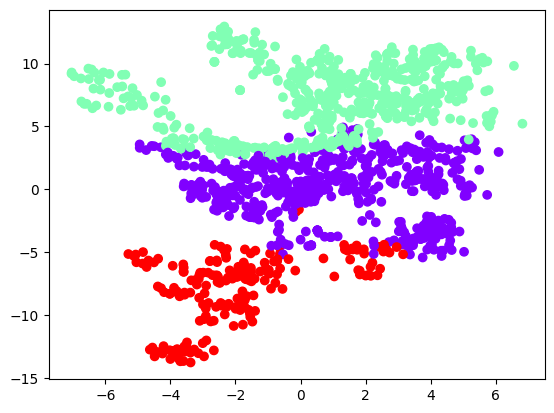

In [37]:
# Finding for V1 & V2 for example
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['V1'],data_with_clusters['V2'],c=data_with_clusters['Clusters'],cmap='rainbow')

# Elbow method

C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Text(0, 0.5, 'Within Cluster Sum of Squares')

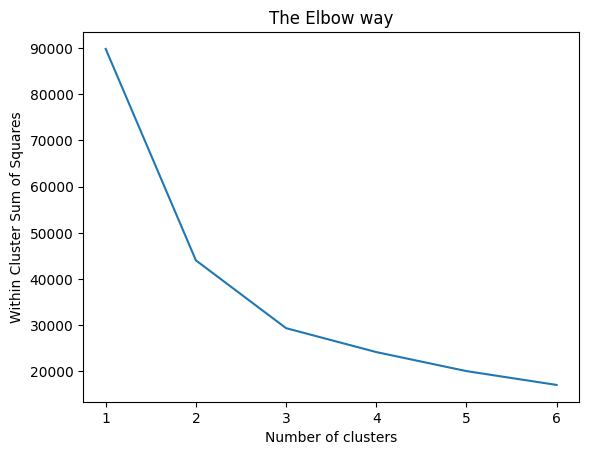

In [33]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow way')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

Plotting/Visualizing the Dataset

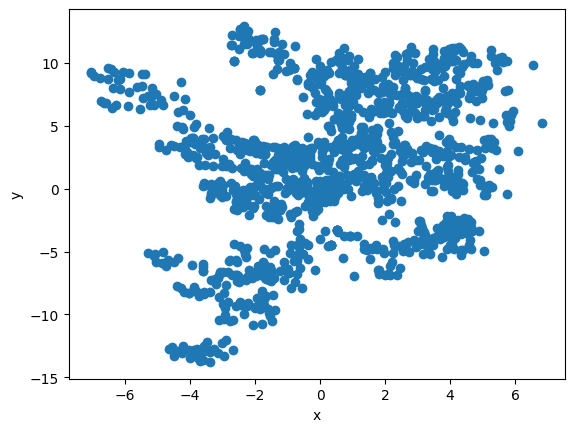

In [31]:
# Plotting
r1 = df['V1']
r2 = df['V2']
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(r1, r2)

C:\Users\mrput\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


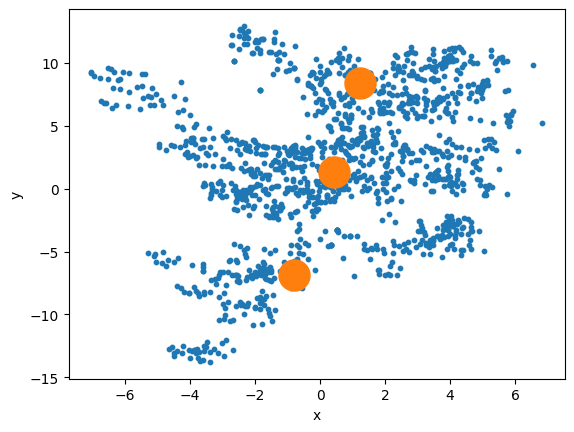

In [32]:
# plotting 3 K Clusters 
r1_r2 = np.column_stack((r1,r2))

kmm = KMeans(n_clusters=3).fit(r1_r2)

clusters = kmm.cluster_centers_
plt.scatter(r1,r2, s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(clusters[:,0], clusters[:,1], s=500)